# Decision Tree Demo

This notebook demonstrates how to build, visualize, and analyze decision trees for classification.

**What you'll learn:**
- Build decision trees from data
- Visualize tree structure
- Understand feature importance
- Evaluate tree performance
- Control tree complexity

## Setup

In [1]:
import cuanalytics
from sklearn.model_selection import train_test_split

# Load data
df = cuanalytics.load_mushroom_data()
train_df, test_df = train_test_split(df, test_size=0.3)
print(train_df['gill-color'].value_counts())
print(test_df.head())

gill-color
b    1184
p    1075
w     847
n     748
g     512
h     511
u     329
k     291
e      67
y      62
o      45
r      15
Name: count, dtype: int64
     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
7211     e         x           f         w       f    n               f   
1609     e         x           s         n       f    n               f   
6037     p         f           y         n       f    y               f   
4942     p         f           y         g       f    f               f   
3773     e         x           f         e       t    n               f   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
7211            w         b          g  ...                        s   
1609            w         b          k  ...                        f   
6037            c         n          b  ...                        s   
4942            c         b          h  ...                        k   
3773            c         b     

## Step 1: Build Your First Decision Tree

Let's start with a simple tree with limited depth.

In [2]:
# Build a shallow tree (depth = 2)
tree = cuanalytics.fit_tree(train_df, target='class', max_depth=2)


Decision Tree fitted successfully!
  Classes: ['e', 'p']
  Features: 22 original (117 after encoding)
  Numeric features: []
  Categorical features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
  Training samples: 5686
  Max depth: 2
  Criterion: entropy


## Step 2: Visualize the Tree

Each node shows:
- The splitting rule (e.g., "odor <= 0.5")
- Number of samples in that node
- Class distribution
- Predicted class (color coded)

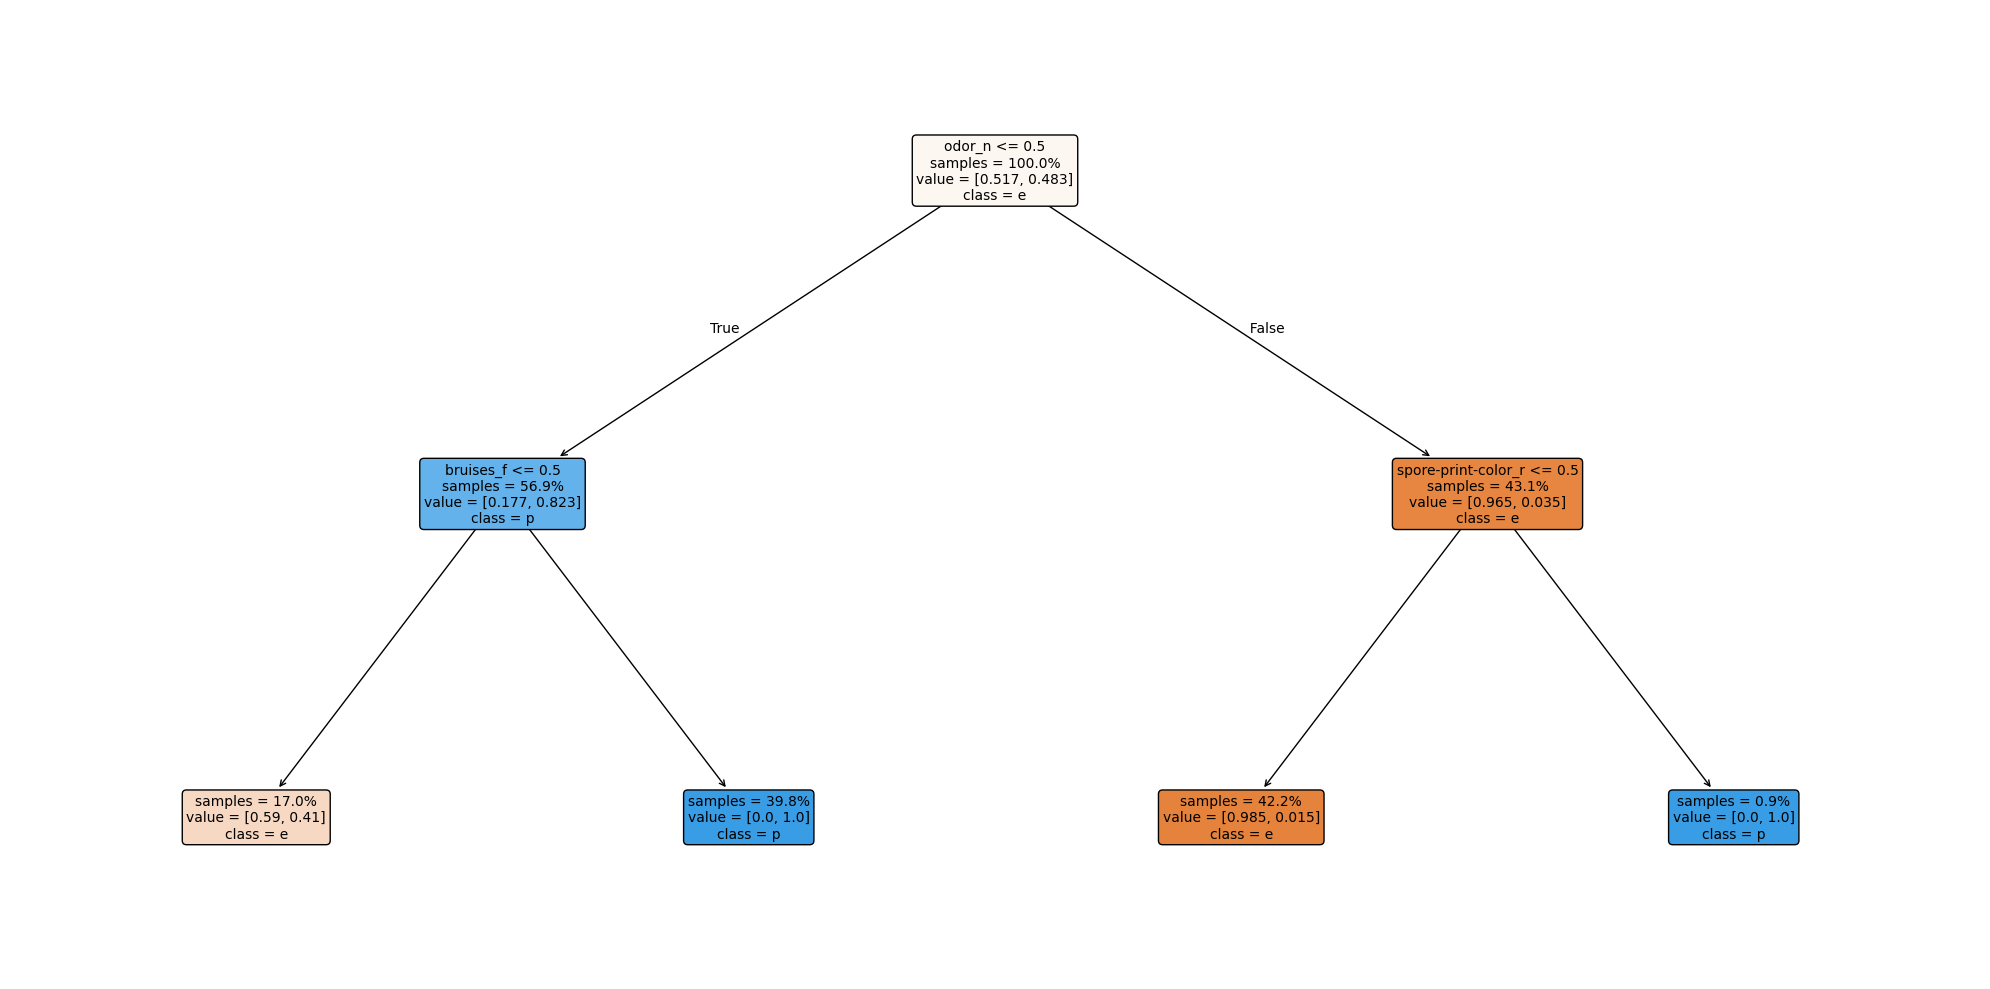


Decision Tree Visualization:
  • Node color = dominant class
  • Darker color = more confident (purer node)
  • Each node shows: split condition, samples, and class distribution


In [7]:
tree.visualize(show_probabilities=True)

## Step 3: Check Accuracy

How well does our tree classify the mushrooms?

In [10]:
accuracy = tree.score(test_df)
print(f"Accuracy: {accuracy:.2%}")
print(f"\nThis means {accuracy*100:.1f}% of mushrooms are correctly classified")

Accuracy: 93.44%

This means 93.4% of mushrooms are correctly classified


## Step 4: View Decision Rules

Let's see the actual rules the tree uses to make decisions.


In [13]:
rules = tree.get_rules()
print("Decision Rules:")
print("=" * 60)
print(rules)


Decision Rules:
|--- odor_n <= 0.50
|   |--- bruises_f <= 0.50
|   |   |--- class: 0
|   |--- bruises_f >  0.50
|   |   |--- class: 1
|--- odor_n >  0.50
|   |--- spore-print-color_r <= 0.50
|   |   |--- class: 0
|   |--- spore-print-color_r >  0.50
|   |   |--- class: 1



## Step 5: Feature Importance

Which features did the tree find most useful?

In [15]:
importance = tree.get_feature_importance()
print("Feature Importance Ranking:")
print("=" * 60)
print(importance.to_string(index=False))

Feature Importance Ranking:
                   feature  importance
                    odor_n    0.663896
                 bruises_f    0.274851
       spore-print-color_r    0.061253
               cap-shape_b    0.000000
  stalk-color-below-ring_g    0.000000
              veil-color_y    0.000000
              veil-color_w    0.000000
              veil-color_o    0.000000
              veil-color_n    0.000000
               veil-type_p    0.000000
  stalk-color-below-ring_y    0.000000
  stalk-color-below-ring_w    0.000000
  stalk-color-below-ring_p    0.000000
  stalk-color-below-ring_o    0.000000
  stalk-color-below-ring_n    0.000000
  stalk-color-below-ring_e    0.000000
             ring-number_o    0.000000
  stalk-color-below-ring_c    0.000000
  stalk-color-below-ring_b    0.000000
  stalk-color-above-ring_y    0.000000
  stalk-color-above-ring_w    0.000000
  stalk-color-above-ring_p    0.000000
  stalk-color-above-ring_o    0.000000
  stalk-color-above-ring_n    0.0000

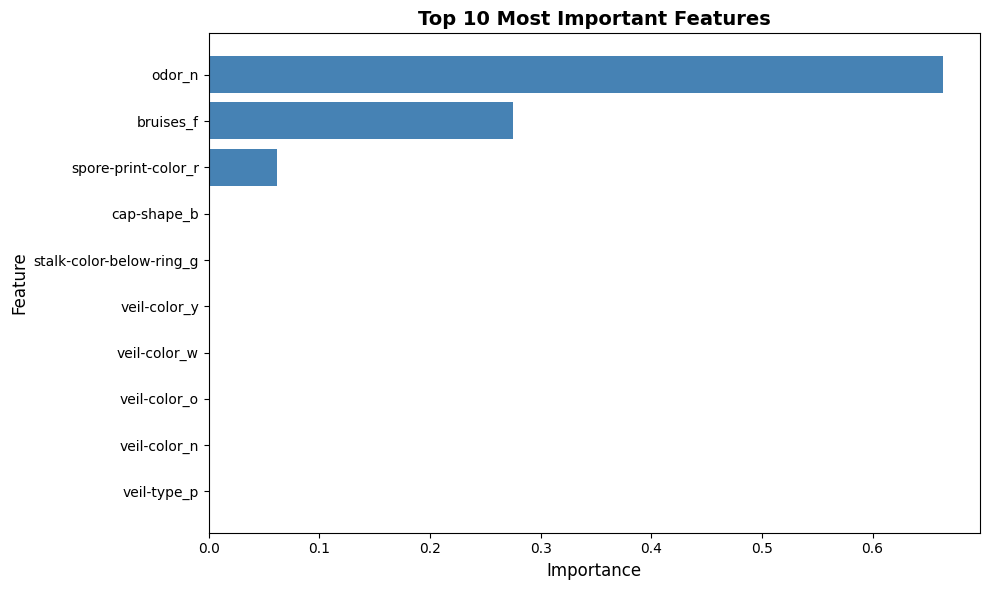

In [16]:
# Visualize feature importance
import matplotlib.pyplot as plt

top_features = importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

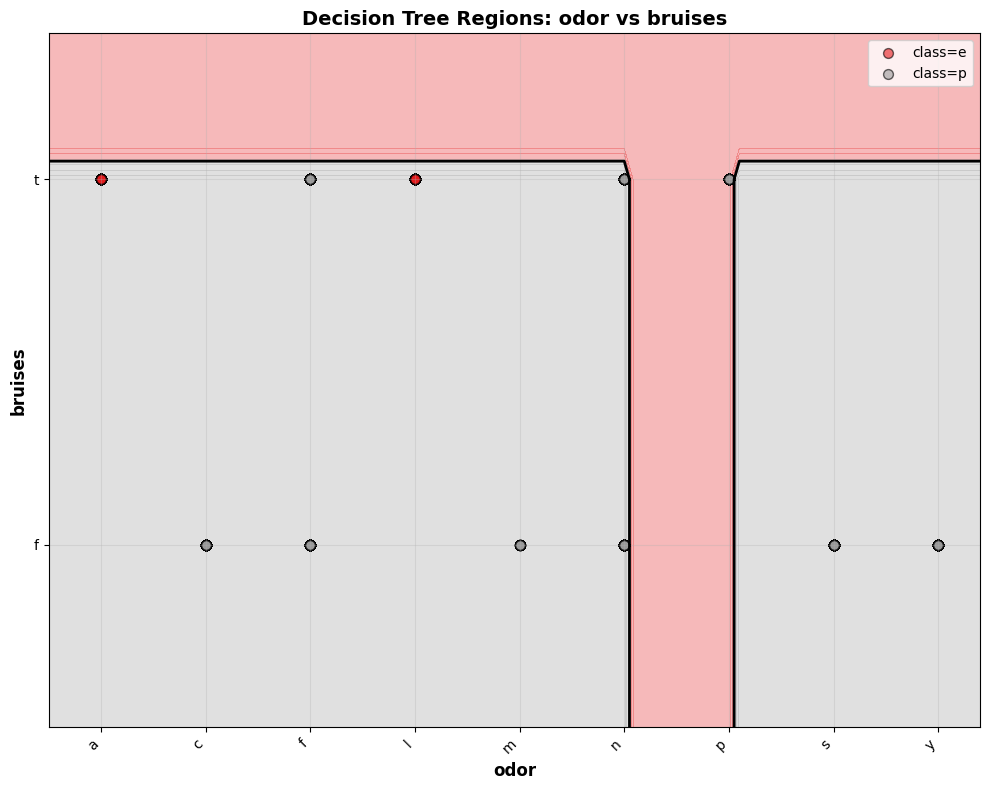


Decision Regions (2D visualization):
  • Shows how tree classifies based on odor and bruises
  • Other features held at median (numeric) or mode (categorical)
  • Black lines = decision boundaries


In [18]:
tree.visualize_features(feature1='odor', feature2='bruises')